# Using opencv - basic image operations

We will explore basic image operations which can be performed by opencv.

In [1]:
# make sure opencv is installed
! pip install opencv-python --quiet
! pip install matplotlib --quiet

## Reading an image and displaying properties
The opencv module allows us to read images along with their basic properties.
The image data can be displayed using the matplotib module.

In [2]:
# import the necessary modules
import cv2 as cv
from matplotlib import pyplot as plt 

# define path constants
INPUT_DIR = "./images/input/"
OUTPUT_DIR = "./images/output/"
INPUT_IMAGE = "UTCN_1991_promotion_after_25_years.png"

In [3]:
# read the image data, forcing color conversion
original_image_data = cv.imread(
    filename = INPUT_DIR + "/" + INPUT_IMAGE, # specification of input file
    flags = cv.IMREAD_COLOR # the image will be read forcing color conversion
)

In [4]:
# define a function for displaying images
def display_image(image_data, conversion = None, cmap = None):
    
    # set the image size
    fig = plt.figure(frameon= False)
    fig.set_size_inches(image_data.shape[1] / 100,  image_data.shape[0] / 100)
    
    # adjust image data in order to perform data conversion 
    image_data_adjusted = image_data
    if conversion:
        image_data_adjusted = cv.cvtColor(image_data, conversion)

    # display image data
    plt.imshow(
        X = image_data_adjusted,
        cmap = cmap
    )
    
    # hide grid ticks
    plt.xticks([])
    plt.yticks([])
    
    # show the image plot
    plt.show()
    
    return

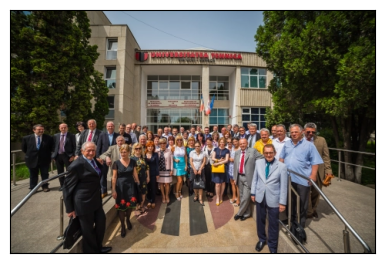

In [5]:
# display the image data
display_image(
    image_data = original_image_data, # pass the image data
    conversion = cv.COLOR_BGR2RGB # convert BGR data to RGB data
)

In [6]:
# display the image properties from data
def display_image_properties(image_data):
    image_properties = {
        "width": image_data.shape[1],
        "height": image_data.shape[0],
        "pixels": image_data.shape[1] * image_data.shape[0],
        "channels": image_data.shape[2] if len(image_data.shape) == 3 else 1 
    }

    print("The image has the following properties {0}".format(image_properties))
    
    return

In [7]:
# display original image properties from data
display_image_properties(original_image_data)

The image has the following properties {'width': 474, 'height': 316, 'pixels': 149784, 'channels': 3}


## Image transformation
OpenCV allows transformation of images such as resizing, clipping or rotation.

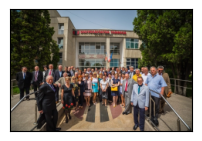

The image has the following properties {'width': 237, 'height': 158, 'pixels': 37446, 'channels': 3}


In [8]:
# resize the image at half of its size
half_size_image_data = cv.resize(
    src = original_image_data, # use original image
    dsize = (original_image_data.shape[1] // 2, original_image_data.shape[0] // 2), # scale the image at half size
    interpolation = cv.INTER_AREA # using a specific interpolation techniques
)

# display the image data
display_image(
    image_data = half_size_image_data, # pass the image data
    conversion = cv.COLOR_BGR2RGB # convert BGR data to RGB data
)

# display the scaled image properties
display_image_properties(half_size_image_data)

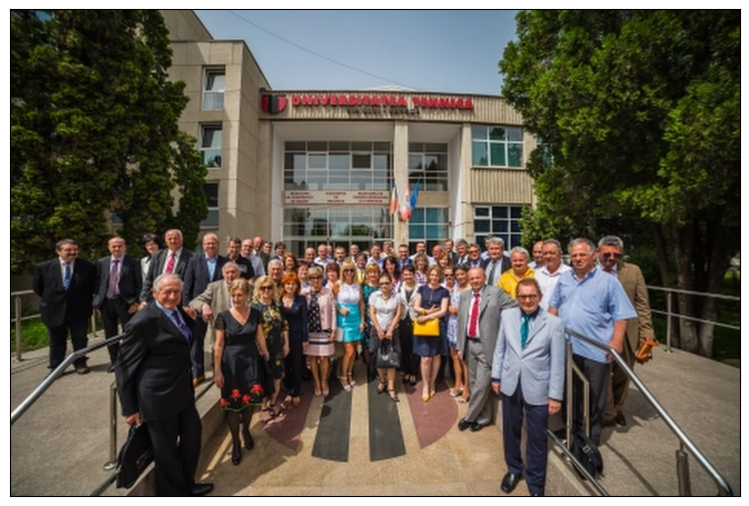

The image has the following properties {'width': 948, 'height': 632, 'pixels': 599136, 'channels': 3}


In [9]:
# resize the image at double of its size
double_size_image_data = cv.resize(
    src = original_image_data, # use original image
    dsize = (original_image_data.shape[1] * 2, original_image_data.shape[0] * 2), # scale the image at double size
    interpolation = cv.INTER_LANCZOS4 # using a specific interpolation techniques
)

# display the image data
display_image(
    image_data = double_size_image_data, # pass the image data
    conversion = cv.COLOR_BGR2RGB # convert BGR data to RGB data
    
)

# display the scaled image properties
display_image_properties(double_size_image_data)

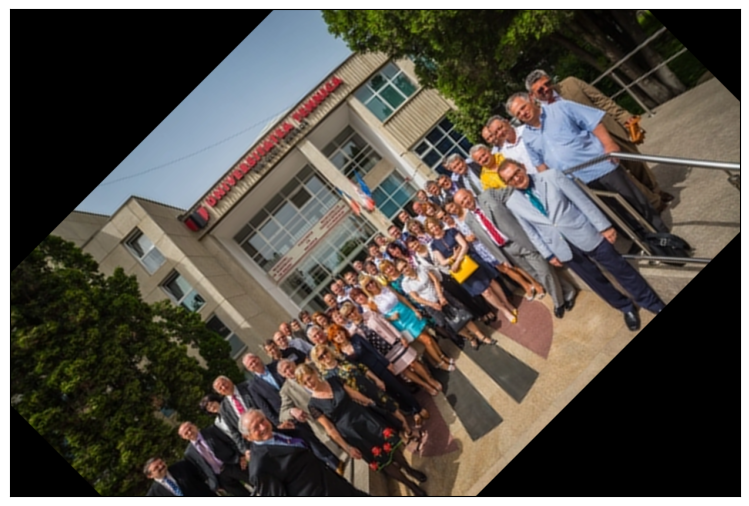

The image has the following properties {'width': 948, 'height': 632, 'pixels': 599136, 'channels': 3}


In [10]:
# resize the double sized image at 45 degree angle along its center
# image_center = (original_image_data[1] // 2, original_image_data[0] // 2)
image_center = (double_size_image_data.shape[1] // 2, double_size_image_data.shape[0] // 2)

rotation_matrix = cv.getRotationMatrix2D(
    center = image_center, # using the image center for rotation
    angle = 45.0, # specifying the rotation degree
    scale = 1.0 # preserve scaling
)

rotated_image_data = cv.warpAffine(
    src = double_size_image_data, # use double sized image,
    M =  rotation_matrix,
    dsize = (double_size_image_data.shape[1], double_size_image_data.shape[0])
)

# display the image data
display_image(
    image_data = rotated_image_data, # pass the image data
    conversion = cv.COLOR_BGR2RGB # convert BGR data to RGB data
)

# display the rotated image properties
display_image_properties(rotated_image_data)

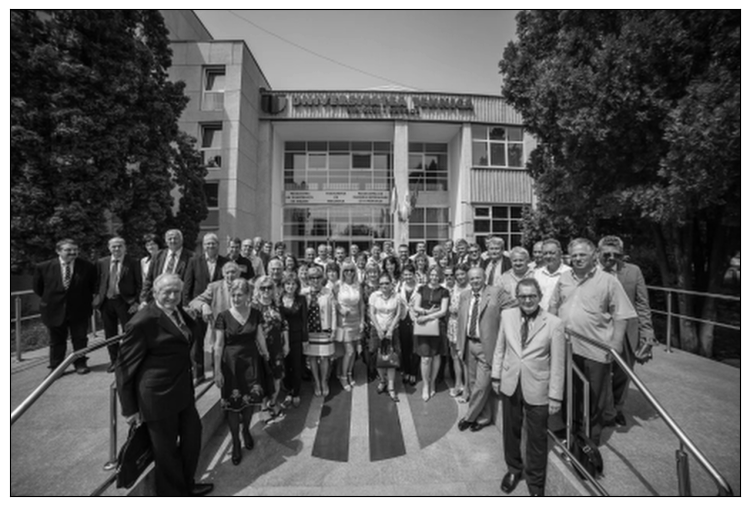

The image has the following properties {'width': 948, 'height': 632, 'pixels': 599136, 'channels': 1}


In [11]:
# transform the image to grayscale color
gray_scale_image_data = cv.cvtColor(
    src = double_size_image_data,
    code = cv.COLOR_BGR2GRAY 
)

display_image(
    image_data = gray_scale_image_data, # pass the image data
    cmap = "gray"   
)

display_image_properties(gray_scale_image_data)

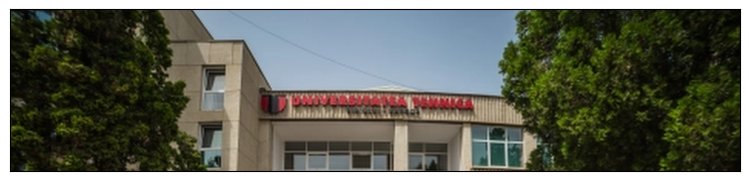

In [12]:
# it is possible to extract a region of interest from an image

# we will define a rectangular area of interest
# starting from 0, 0
# having the same with as the double sized image
# and the height being one third of the double sized image
rectangular_area = {
    "x": 0,
    "y": 0,
    "w": double_size_image_data.shape[1],
    "h": double_size_image_data.shape[0] // 3
}

# the image can be clipped using simple
# image array operations
clipped_image_data = double_size_image_data[
    rectangular_area["y"]: rectangular_area["y"] + rectangular_area["h"],
    rectangular_area["x"]: rectangular_area["x"] + rectangular_area["w"]
] 

# display the image data
display_image(
    image_data = clipped_image_data, # pass the image data
    conversion = cv.COLOR_BGR2RGB # convert BGR data to RGB data
)

## Saving image data
Images can be saved using different formats, based on file extension.

In [13]:
# write the double sized image in JPG format
jpg_write_result = cv.imwrite(
    filename = OUTPUT_DIR + "/" + "resized_image.jpg",
    img = double_size_image_data
)

print("The image has been saved {0} in JPG format".format("successfully" if jpg_write_result else "unsuccessfully"))

The image has been saved successfully in JPG format


In [14]:
# write the double sized image in JPG format
png_write_result = cv.imwrite(
    filename = OUTPUT_DIR + "/" + "gray_scale_image.png",
    img = gray_scale_image_data
)

print("The image has been saved {0} in PNG format".format("successfully" if png_write_result else "unsuccessfully"))

The image has been saved successfully in PNG format
